# Energy Efficiency
##### *Dataset taken from Kaggle.com (https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset)*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
pal = sns.color_palette('viridis')
pal.as_hex()[:]

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']

In [3]:
pal.as_hex()

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']

## Nature of the Dataset

In [4]:
df = pd.read_csv('EnergyEfficiency.csv')
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
Y = df[['Heating_Load', 'Cooling_Load']]

## Exploratory Data Analysis

### Target Variables: Heating and Cooling Load

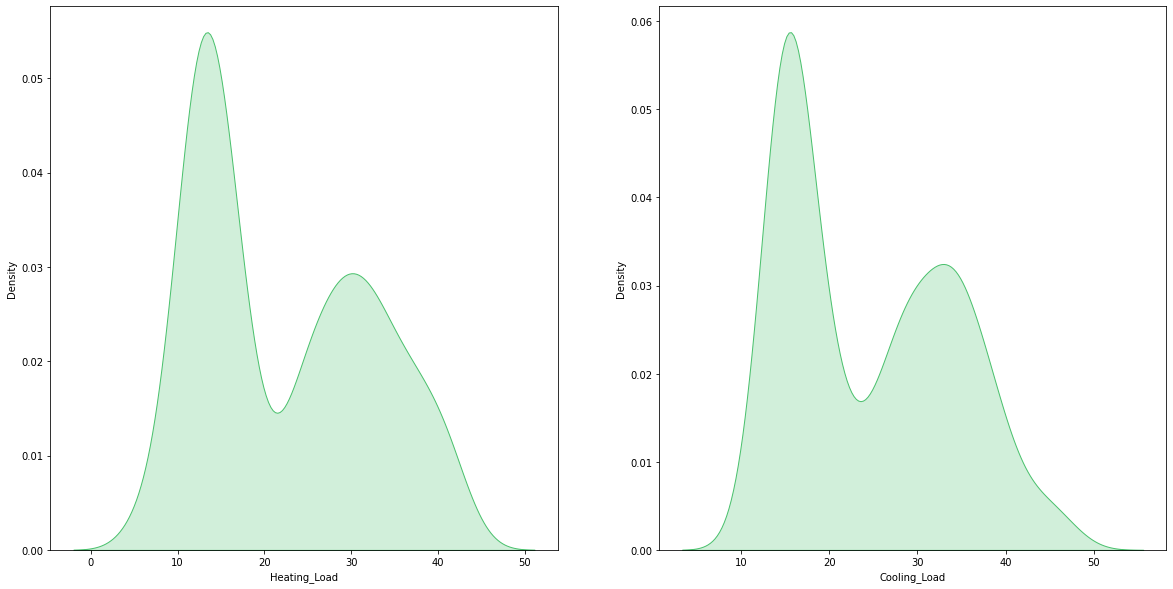

In [7]:
fig_1, axs_1 = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

for i in range(len(Y.columns)):
    sns.kdeplot(x=Y['%s' %(Y.columns[i])], color='#4ac16d', fill=True, ax=axs_1[i])

In [8]:
Y.median()

Heating_Load    18.95
Cooling_Load    22.08
dtype: float64

It is initially observed that the distribution of the two target variables are similar and not normal. The median of the heating load is 18.95 and the cooling load is 22.08.

In [9]:
num_corr = Y.corr()
num_corr

,Heating_Load,Cooling_Load
Heating_Load,1.000000,0.975862
Cooling_Load,0.975862,1.000000


### Feature: Relative Compactness

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Density'>

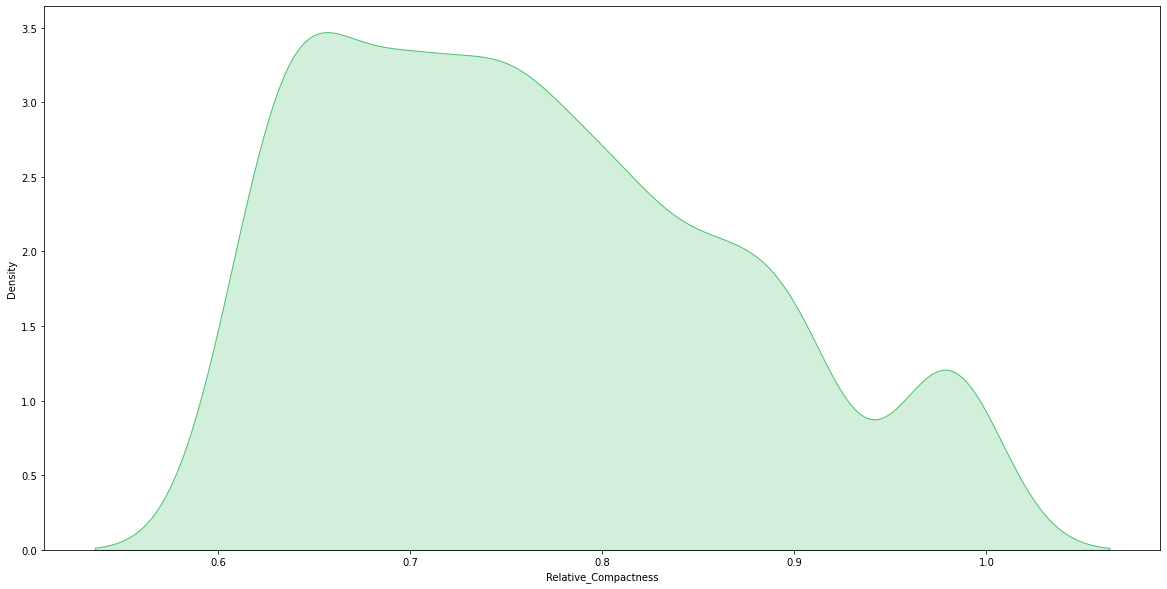

In [10]:
fig_2, axs_2 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

sns.kdeplot(x=X['Relative_Compactness'], color='#4ac16d', fill=True)

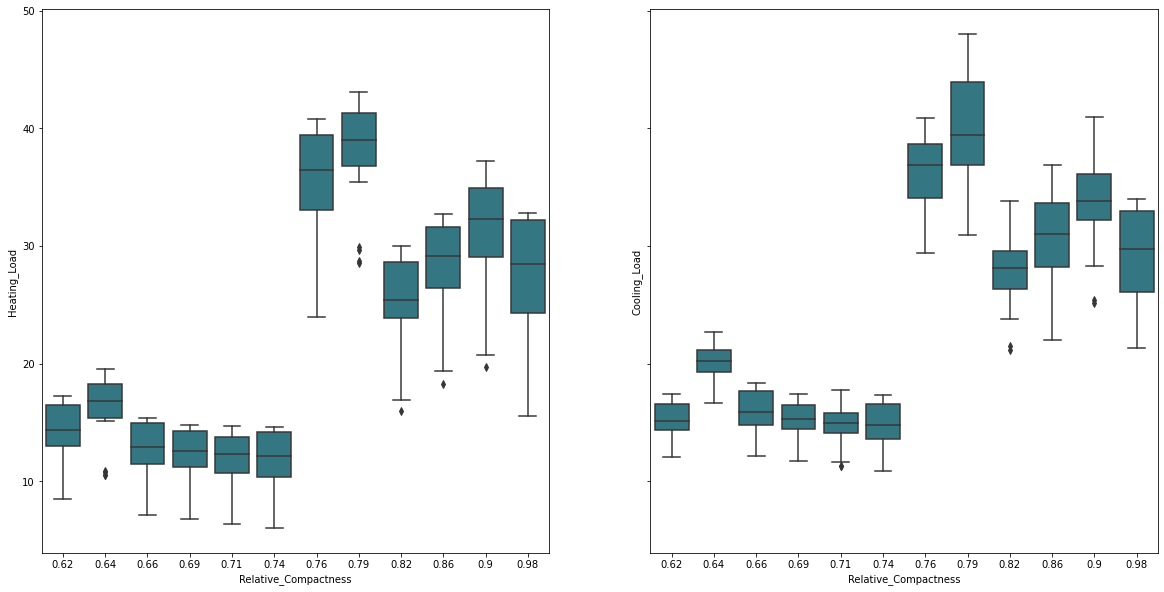

In [11]:
fig_3, axs_3 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Relative_Compactness'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_3[i])

In [12]:
relcom_y = df.groupby('Relative_Compactness')[['Heating_Load', 'Cooling_Load']].median()
relcom_f = df.groupby('Relative_Compactness')[['Relative_Compactness']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([relcom_f, relcom_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Relative_Compactness,,,
0.62,64,14.335,15.105
0.64,64,16.850,20.200
0.66,64,12.930,15.920
0.69,64,12.570,15.295
0.71,64,12.280,14.955
0.74,64,12.140,14.785
0.76,64,36.440,36.860
0.79,64,39.025,39.425
0.82,64,25.405,28.170


There is a disparity in the temperature loads as the compactness reaches 0.76. When the compactness is between 0.62 and 0.74, the heating load is around 14 while the cooling load is greater at around 15. On the other hand, the heating and cooling load are highest at 0.79 compactness.

### Feature: Surface Area

<AxesSubplot:xlabel='Surface_Area', ylabel='Density'>

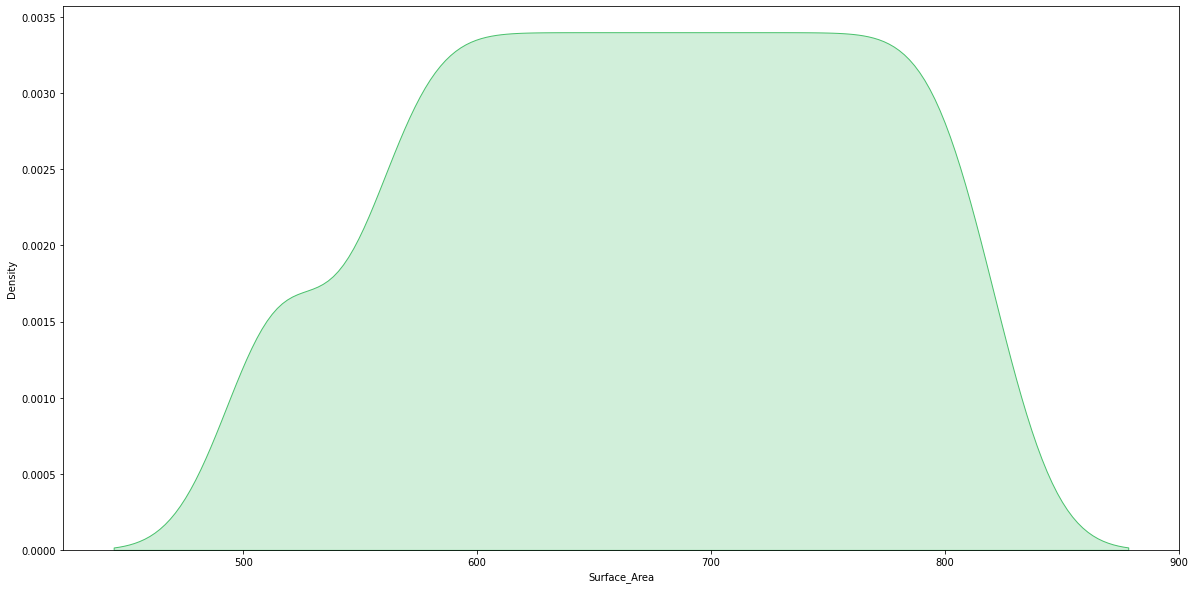

In [13]:
fig_4, axs_4 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Surface_Area'], color='#4ac16d', fill=True)

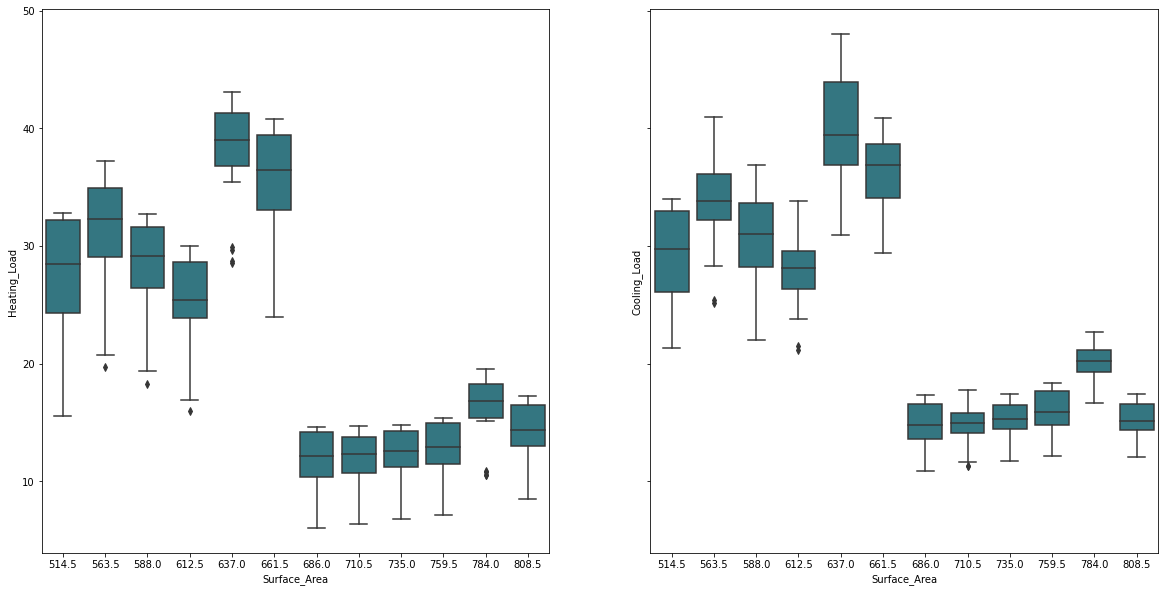

In [14]:
fig_5, axs_5 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Surface_Area'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_5[i])

In [15]:
surfare_y = df.groupby('Surface_Area')[['Heating_Load', 'Cooling_Load']].median()
surfare_f = df.groupby('Surface_Area')[['Surface_Area']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([surfare_f, surfare_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Surface_Area,,,
514.5,64,28.480,29.730
563.5,64,32.320,33.865
588.0,64,29.180,31.035
612.5,64,25.405,28.170
637.0,64,39.025,39.425
661.5,64,36.440,36.860
686.0,64,12.140,14.785
710.5,64,12.280,14.955
735.0,64,12.570,15.295


In contrast with relative compactness, the temperature loads are higher at lower values but decreases at higher surface areas. Areas below 661.5 have heating loads at around 32 while cooling loads at 33. Areas above 661.5, on the other hand, have heating loads at around 13 and cooling loads at 15.

### Feature: Wall Area

<AxesSubplot:xlabel='Wall_Area', ylabel='Density'>

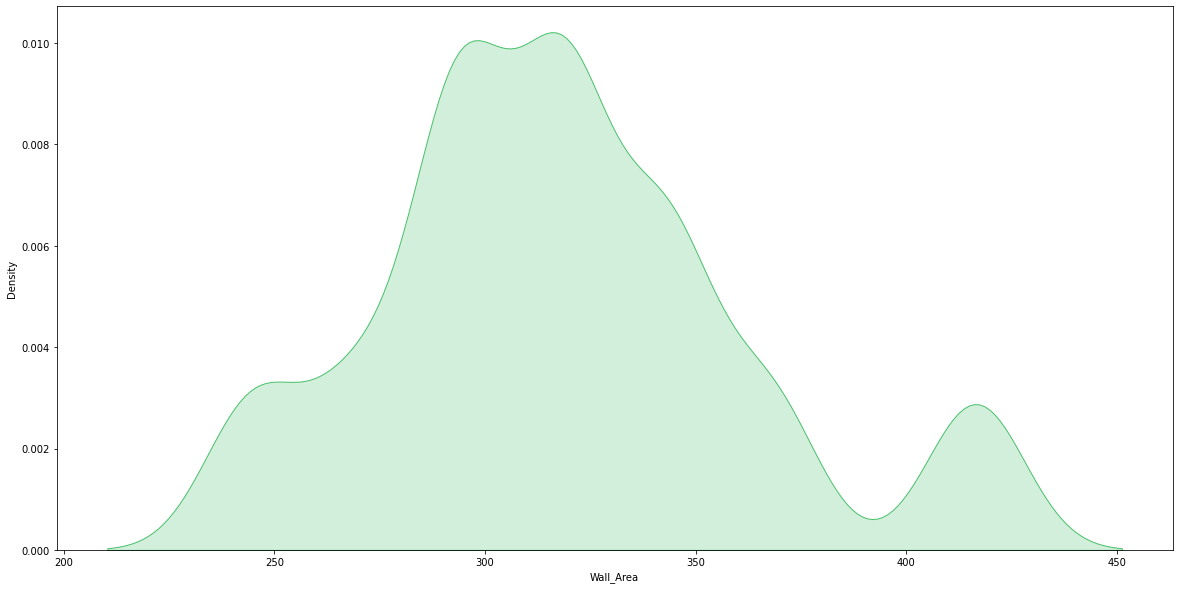

In [16]:
fig_6, axs_6 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Wall_Area'], color='#4ac16d', fill=True)

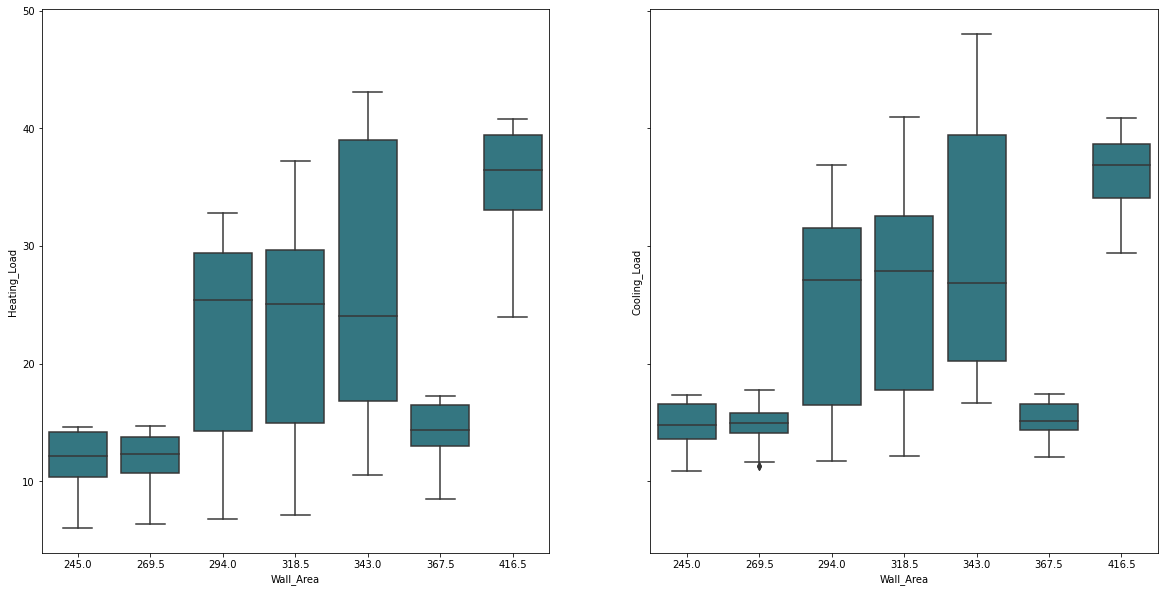

In [17]:
fig_7, axs_7 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Wall_Area'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_7[i])

In [18]:
wallare_y = df.groupby('Wall_Area')[['Heating_Load', 'Cooling_Load']].median()
wallare_f = df.groupby('Wall_Area')[['Wall_Area']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([wallare_f, wallare_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Wall_Area,,,
245.0,64,12.140,14.785
269.5,64,12.280,14.955
294.0,192,25.390,27.100
318.5,192,25.065,27.885
343.0,128,24.020,26.830
367.5,64,14.335,15.105
416.5,64,36.440,36.860


### Feature: Roof Area

<AxesSubplot:xlabel='Roof_Area', ylabel='Density'>

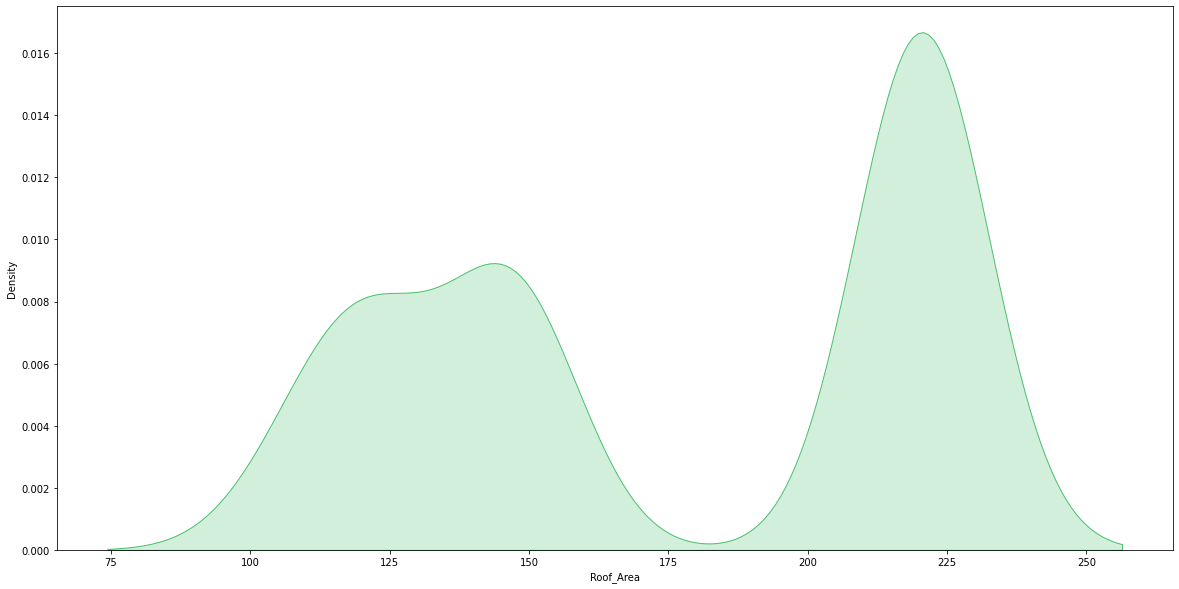

In [19]:
fig_8, axs_8 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Roof_Area'], color='#4ac16d', fill=True)

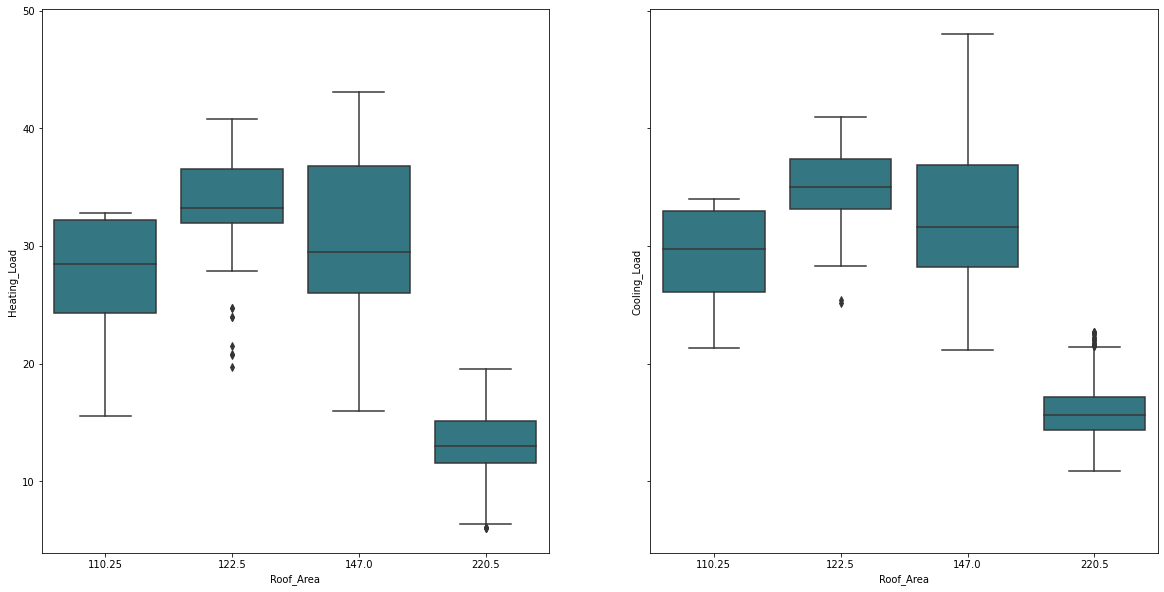

In [20]:
fig_9, axs_9 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Roof_Area'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_9[i])

In [21]:
roofare_y = df.groupby('Roof_Area')[['Heating_Load', 'Cooling_Load']].median()
roofare_f = df.groupby('Roof_Area')[['Roof_Area']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([roofare_f, roofare_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Roof_Area,,,
110.25,64,28.480,29.73
122.50,128,33.270,34.99
147.00,192,29.480,31.65
220.50,384,12.985,15.61


### Feature: Overall Height

<AxesSubplot:xlabel='Overall_Height', ylabel='Density'>

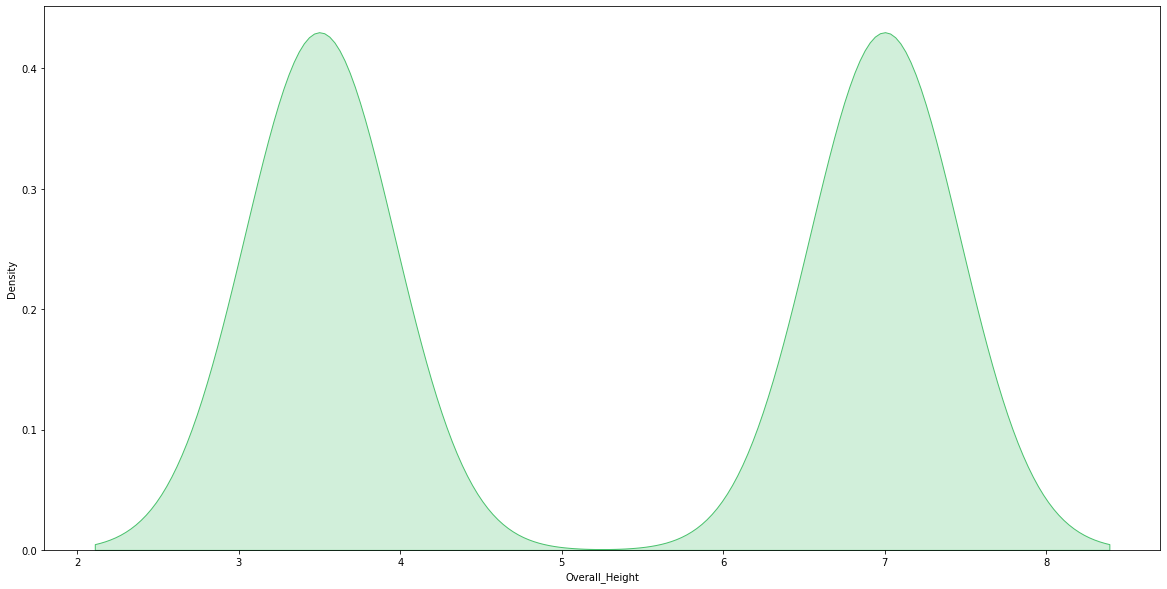

In [22]:
fig_10, axs_10 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Overall_Height'], color='#4ac16d', fill=True)

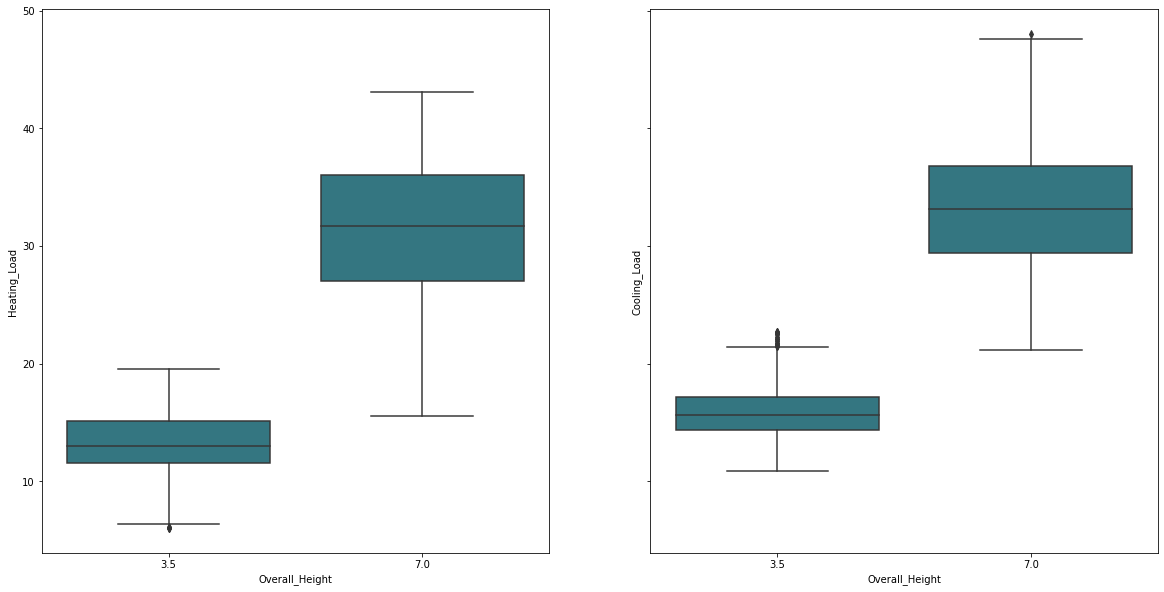

In [23]:
fig_11, axs_11 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Overall_Height'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_11[i])

With only two heights, the larger overall height at 7.0 experiences greater temperature loads at more than 30. On the other hand, the buildings with smaller height have closely related values with heating load centered at 13 and cooling load at 32.

In [24]:
height_y = df.groupby('Overall_Height')[['Heating_Load', 'Cooling_Load']].median()
height_f = df.groupby('Overall_Height')[['Overall_Height']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([height_f, height_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Overall_Height,,,
3.5,384,12.985,15.610
7.0,384,31.675,33.135


### Feature: Glazing Area

<AxesSubplot:xlabel='Glazing_Area', ylabel='Density'>

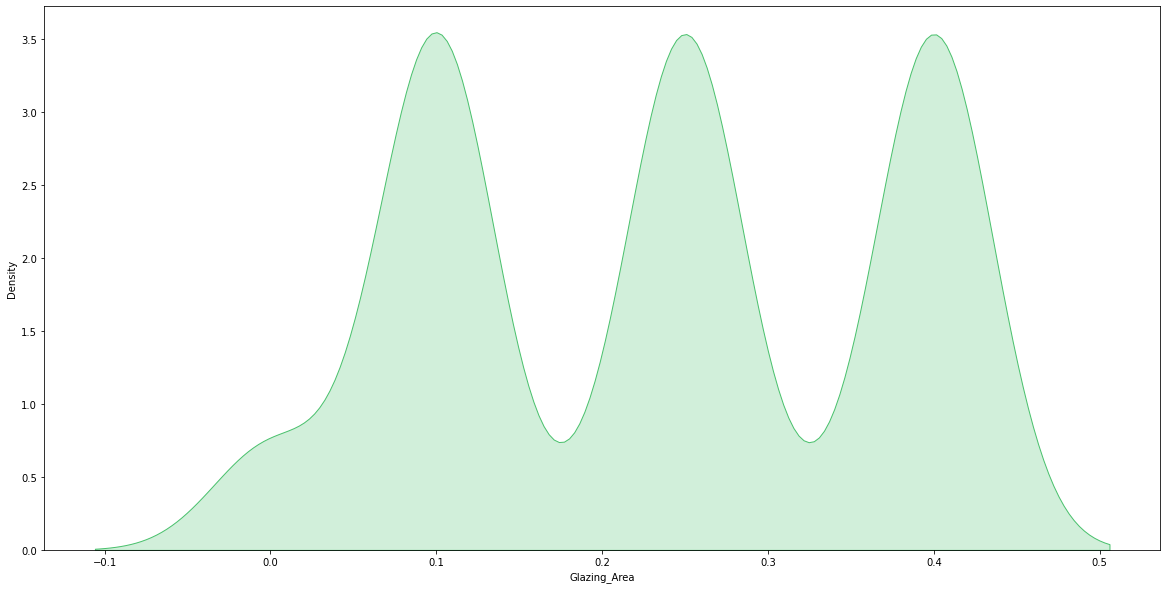

In [25]:
fig_12, axs_12 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Glazing_Area'], color='#4ac16d', fill=True)

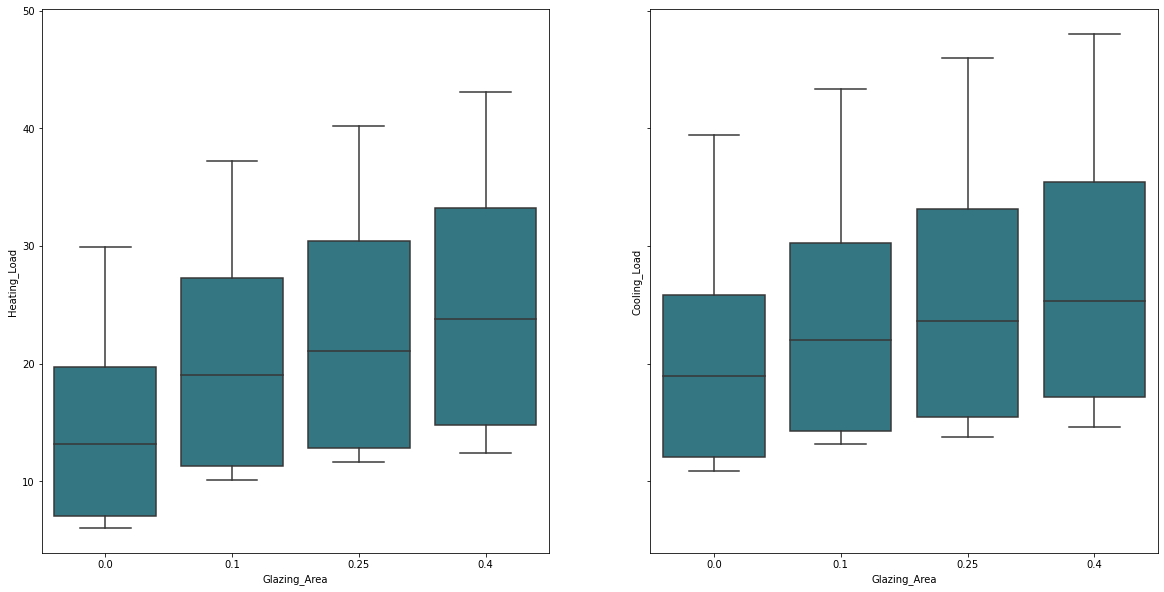

In [26]:
fig_13, axs_13 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Glazing_Area'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_13[i])

In [27]:
glazeare_y = df.groupby('Glazing_Area')[['Heating_Load', 'Cooling_Load']].median()
glazeare_f = df.groupby('Glazing_Area')[['Glazing_Area']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([glazeare_f, glazeare_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Glazing_Area,,,
0.00,48,13.200,18.980
0.10,240,19.000,22.045
0.25,240,21.060,23.635
0.40,240,23.765,25.330


### Feature: Orientation

<AxesSubplot:xlabel='Orientation', ylabel='Density'>

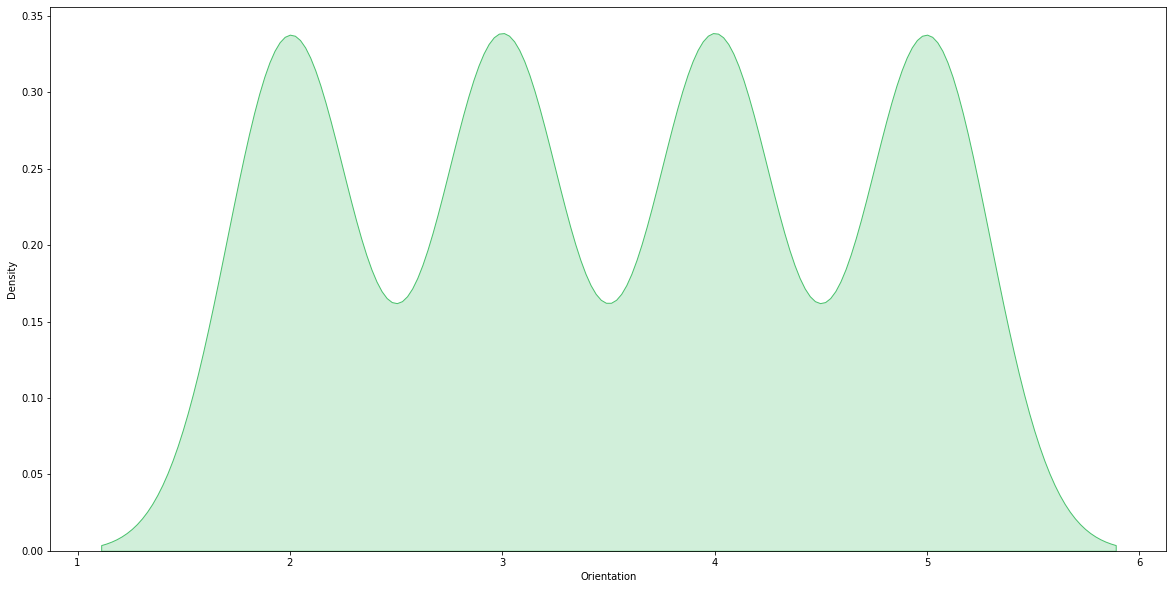

In [28]:
fig_14, axs_14 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Orientation'], color='#4ac16d', fill=True)

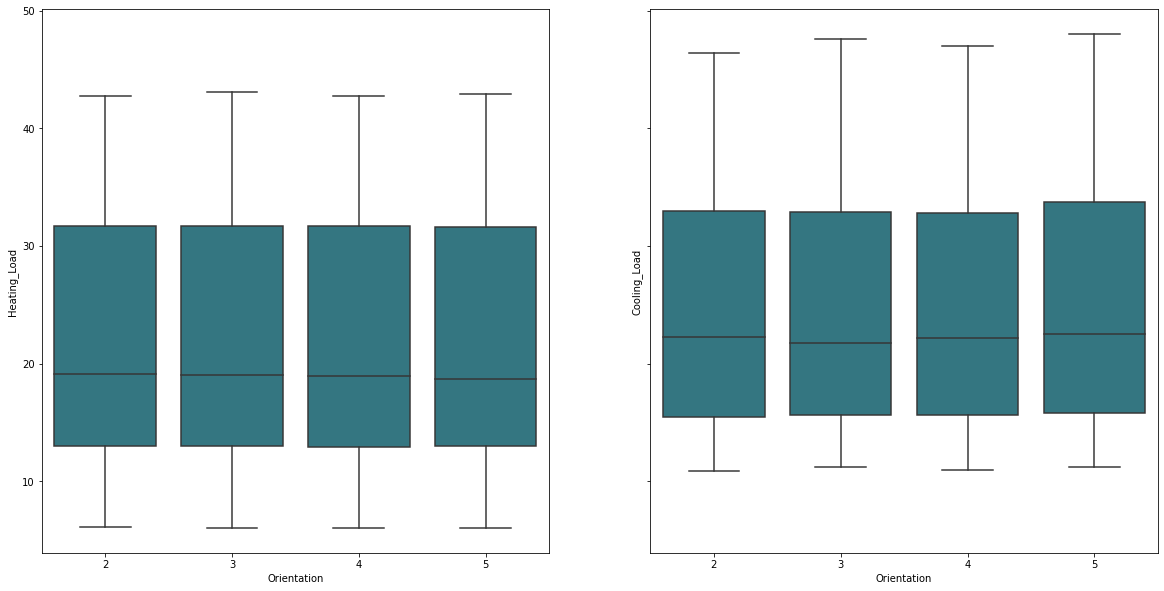

In [29]:
fig_15, axs_15 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Orientation'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_15[i])

In [30]:
orie_y = df.groupby('Orientation')[['Heating_Load', 'Cooling_Load']].median()
orie_f = df.groupby('Orientation')[['Orientation']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([orie_f, orie_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Orientation,,,
2,192,19.130,22.220
3,192,19.005,21.755
4,192,18.950,22.170
5,192,18.650,22.510


### Feature: Glazing Area Distribution

<AxesSubplot:xlabel='Glazing_Area_Distribution', ylabel='Density'>

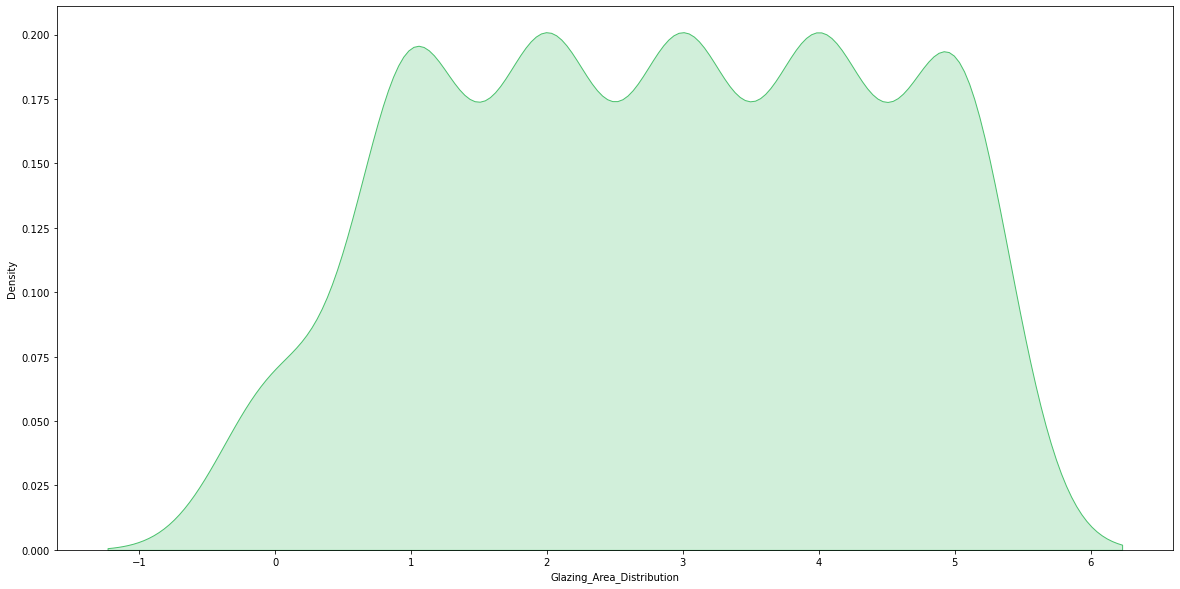

In [31]:
fig_16, axs_16 = plt.subplots(nrows=1, ncols=1, figsize=(20,10))

sns.kdeplot(x=X['Glazing_Area_Distribution'], color='#4ac16d', fill=True)

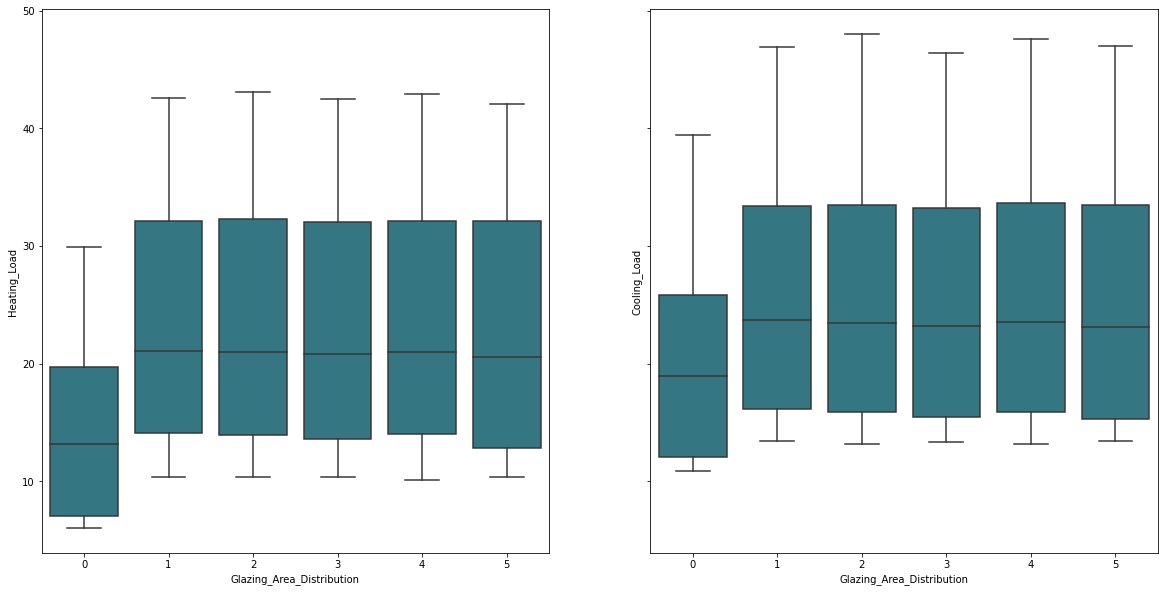

In [32]:
fig_17, axs_17 = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)

for i in range(len(Y.columns)):
    sns.boxplot(x=X['Glazing_Area_Distribution'], y=Y['%s' %(Y.columns[i])], color='#277f8e', ax=axs_17[i])

In [33]:
gad_y = df.groupby('Glazing_Area_Distribution')[['Heating_Load', 'Cooling_Load']].median()
gad_f = df.groupby('Glazing_Area_Distribution')[['Glazing_Area_Distribution']].value_counts().to_frame().rename({0: 'Frequency'}, axis=1)

pd.concat([gad_f, gad_y], axis=1)

,Frequency,Heating_Load,Cooling_Load
Glazing_Area_Distribution,,,
0,48,13.200,18.980
1,144,21.050,23.670
2,144,20.995,23.445
3,144,20.820,23.235
4,144,20.965,23.550
5,144,20.540,23.085


### Feature Interactions

#### Relative Compactness and Surface Area

In this dataset, there is a one-to-one matching of relative compactness to surface area. Furthermore, as the area decreases, the compactness also decreases.

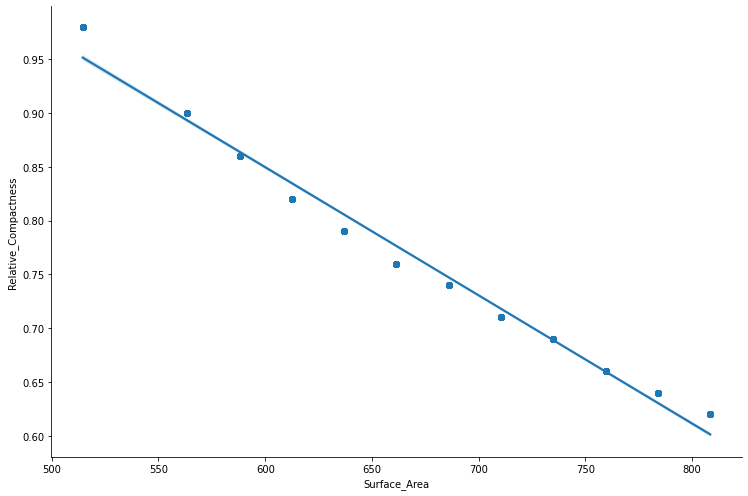

In [34]:
sns.lmplot(x='Surface_Area', y='Relative_Compactness', data=df, height=7, aspect=1.5)

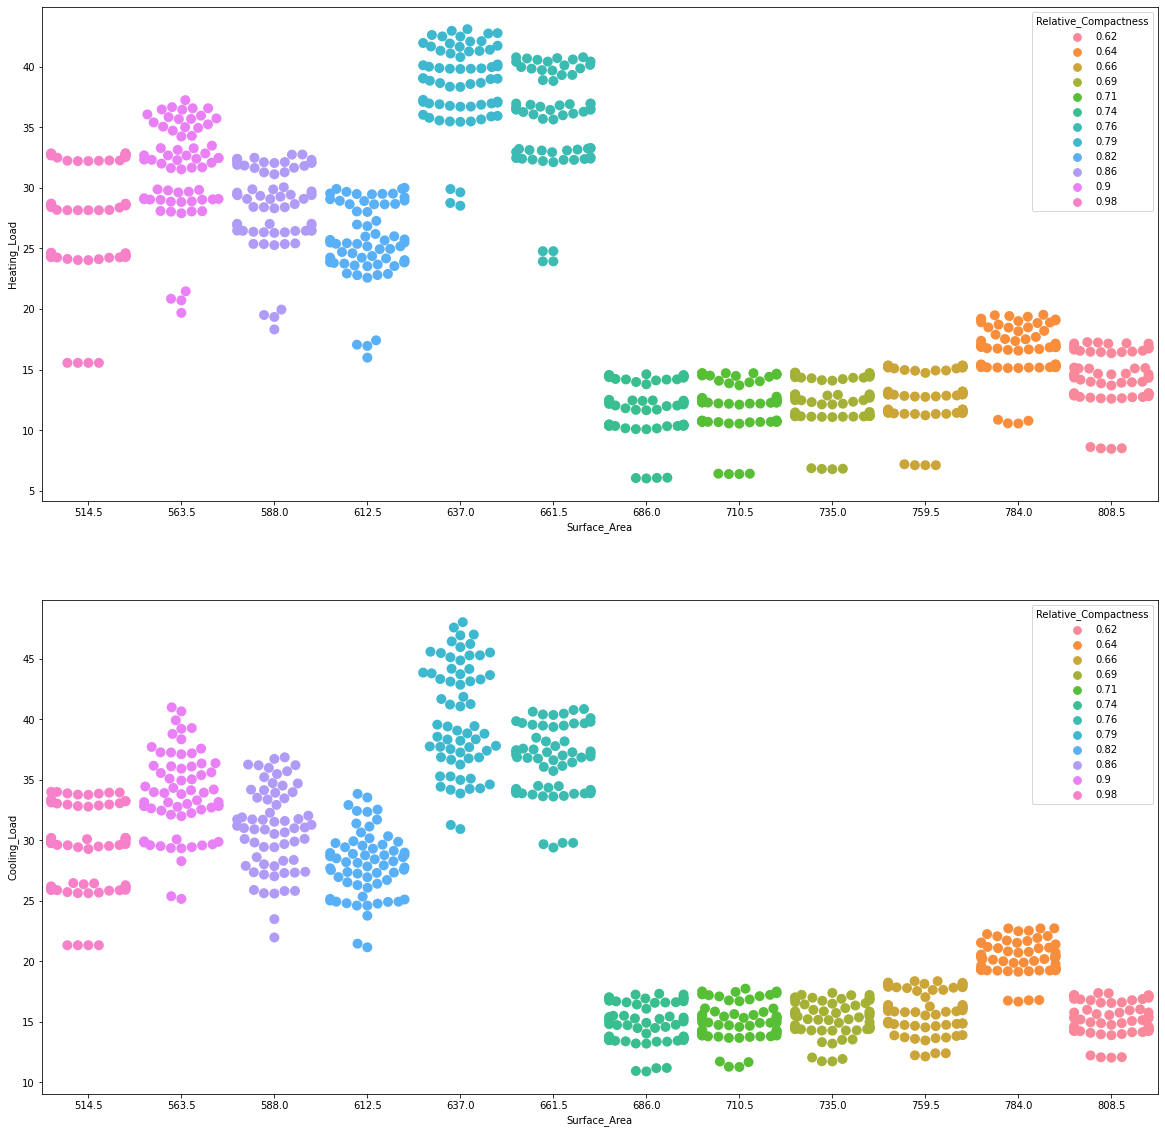

In [35]:
fig_18, axs_18 = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

for i in range(len(Y.columns)):
    sns.swarmplot(x='Surface_Area', y='%s' %(Y.columns[i]), hue='Relative_Compactness', data=df, size=10, ax=axs_18[i])

#### Surface Area and Wall Area

In terms of surface area and wall area, a wall with a specific area can contribute to more than one measurement of surface area.

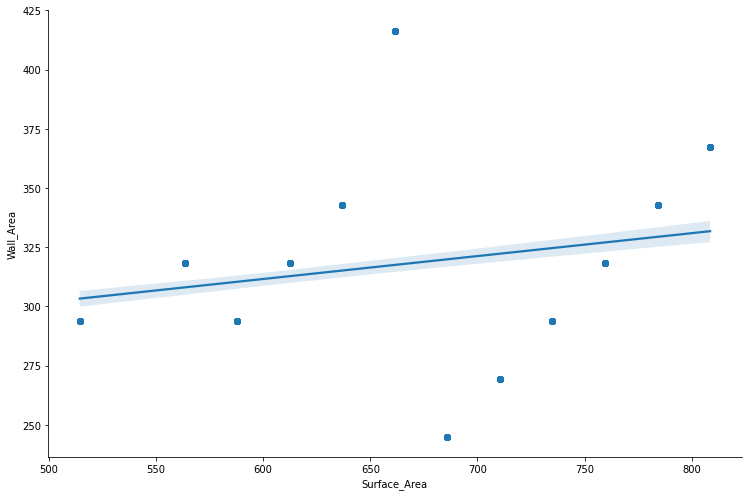

In [36]:
sns.lmplot(x='Surface_Area', y='Wall_Area', data=df, height=7, aspect=1.5)

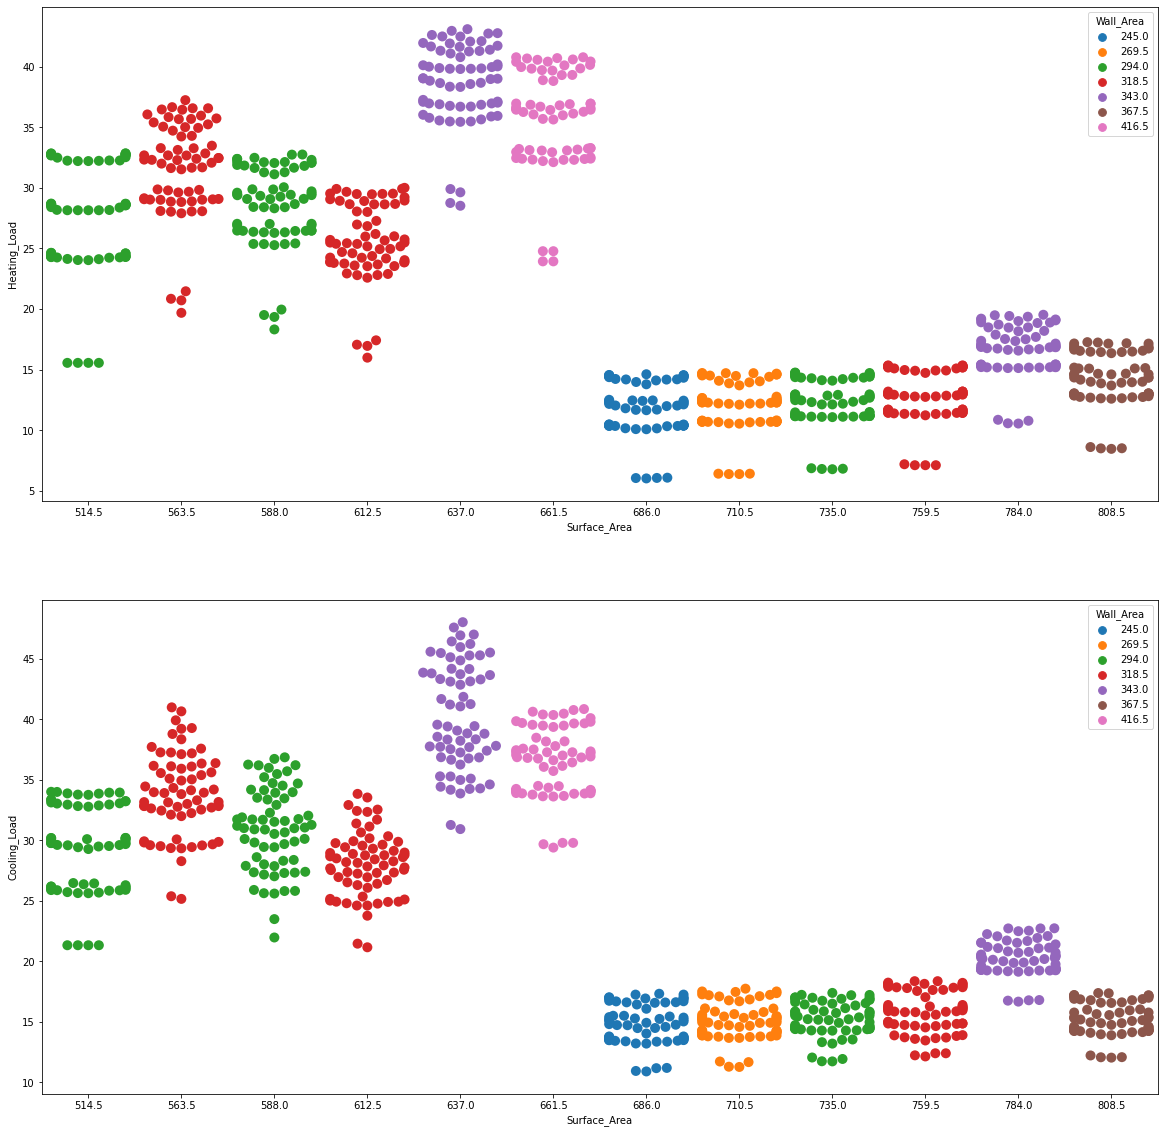

In [37]:
fig_19, axs_19 = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

for i in range(len(Y.columns)):
    sns.swarmplot(x='Surface_Area', y='%s' %(Y.columns[i]), hue='Wall_Area', data=df, size=10, ax=axs_19[i])

#### Surface Area and Glazing Area

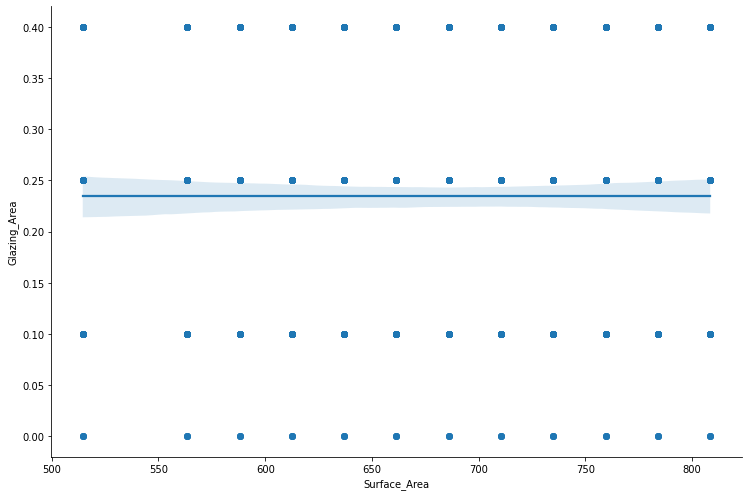

In [38]:
sns.lmplot(x='Surface_Area', y='Glazing_Area', data=df, height=7, aspect=1.5)

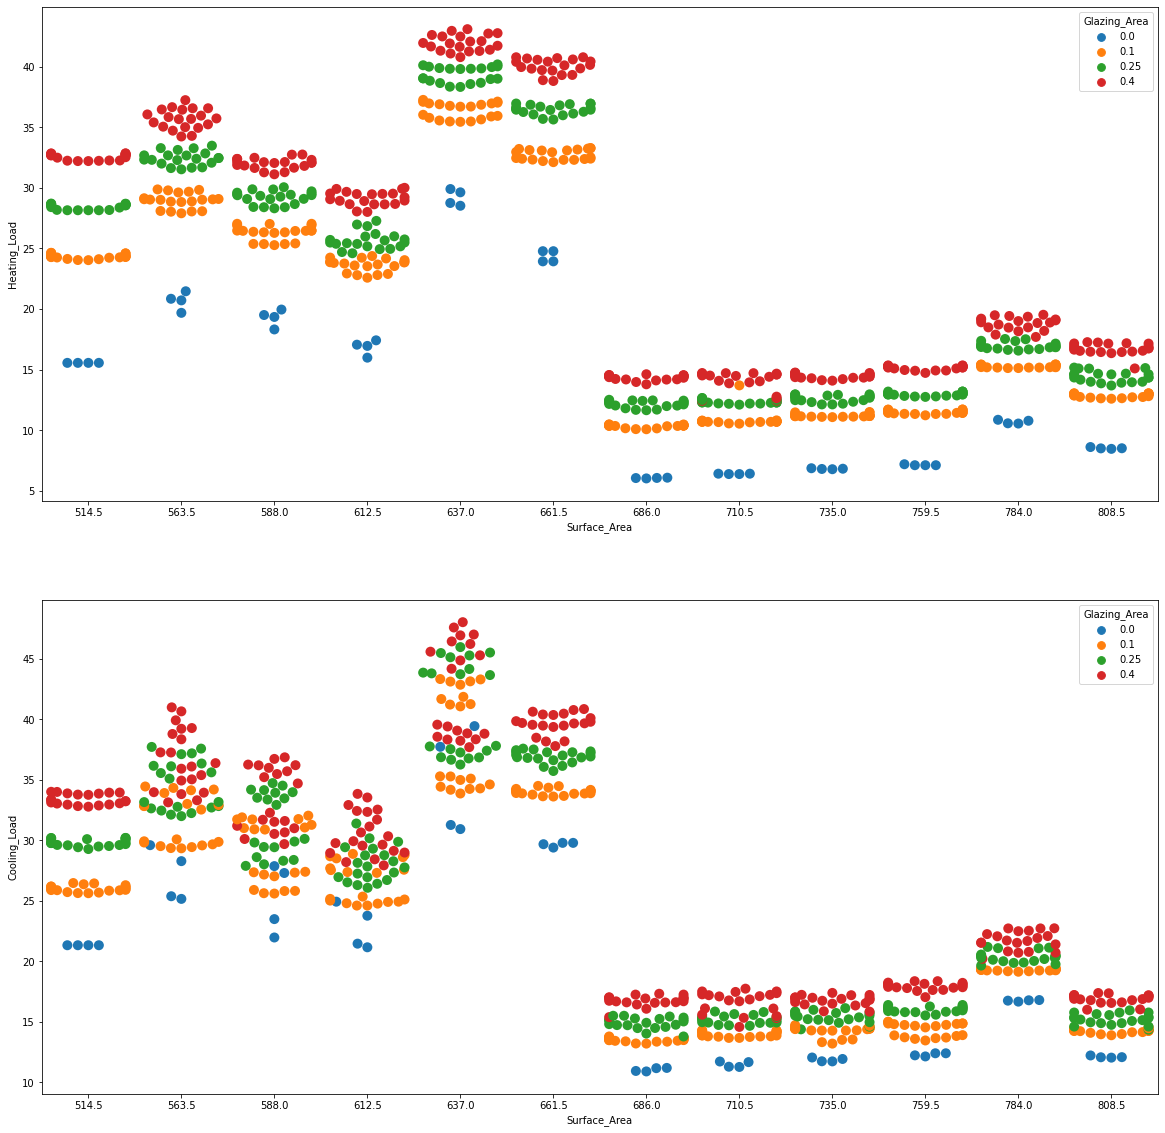

In [39]:
fig_20, axs_20 = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

for i in range(len(Y.columns)):
    sns.swarmplot(x='Surface_Area', y='%s' %(Y.columns[i]), hue='Glazing_Area', data=df, size=10, ax=axs_20[i])

#### Relative Compactness and Glazing Area

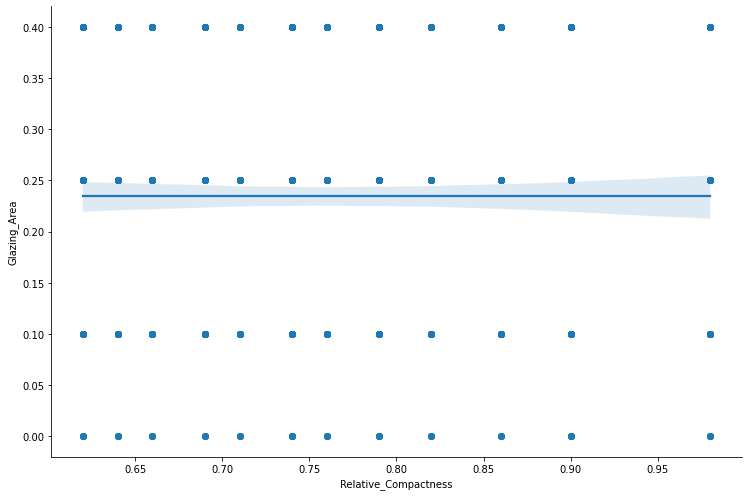

In [40]:
sns.lmplot(x='Relative_Compactness', y='Glazing_Area', data=df, height=7, aspect=1.5)

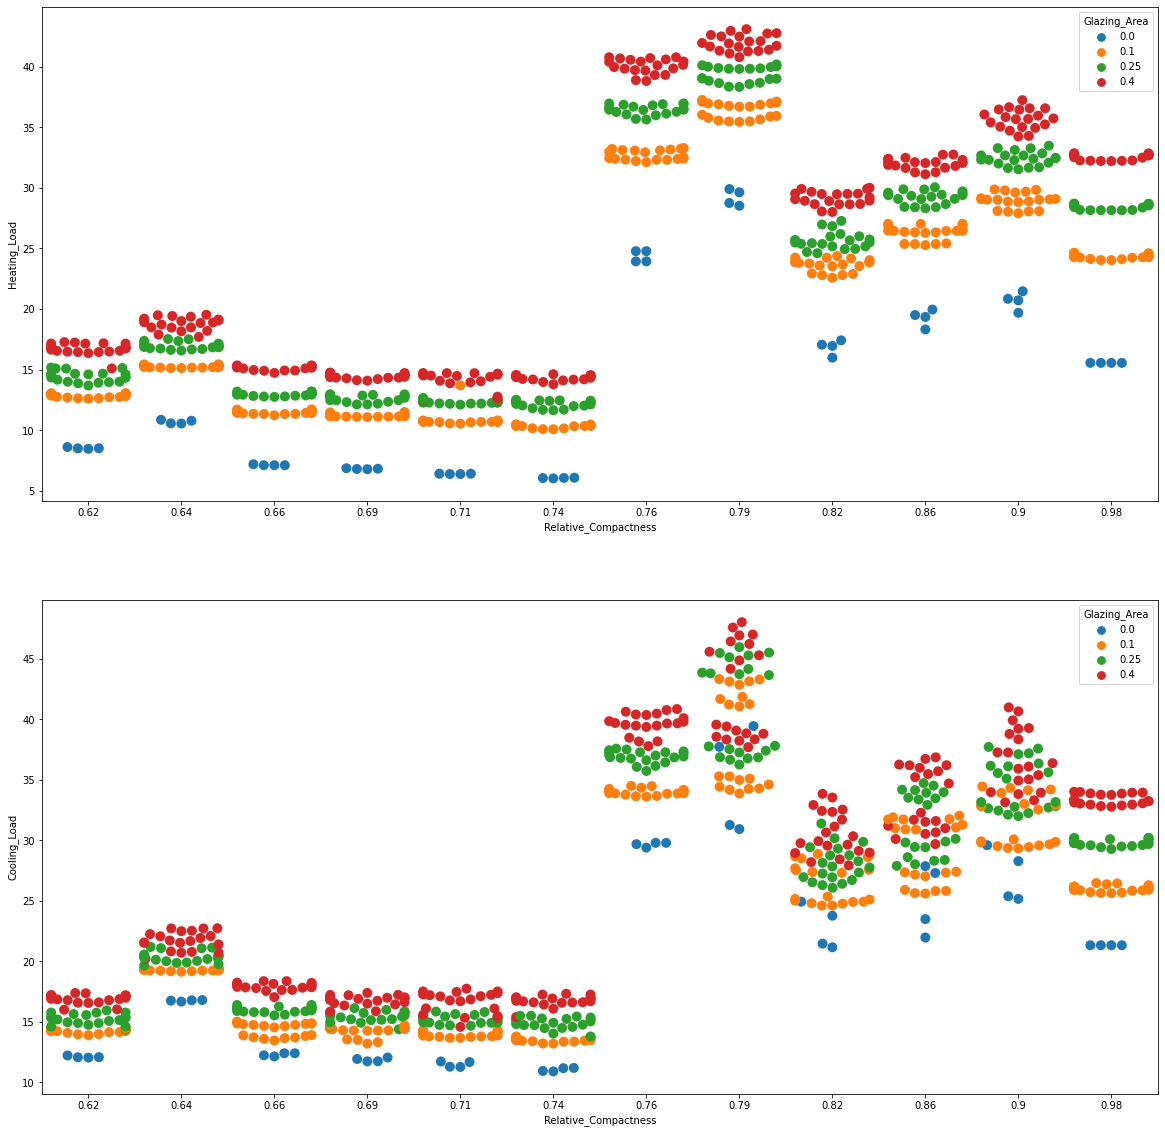

In [41]:
fig_21, axs_21 = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

for i in range(len(Y.columns)):
    sns.swarmplot(x='Relative_Compactness', y='%s' %(Y.columns[i]), hue='Glazing_Area', data=df, size=10, ax=axs_21[i])

#### Overall Height and Glazing Area

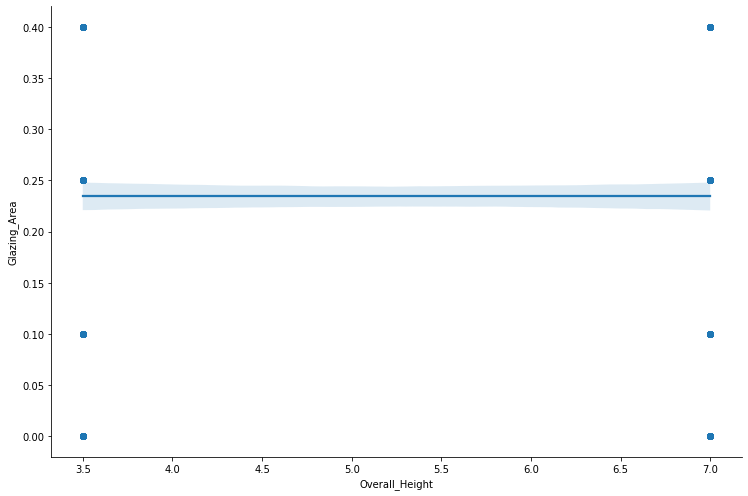

In [42]:
sns.lmplot(x='Overall_Height', y='Glazing_Area', data=df, height=7, aspect=1.5)

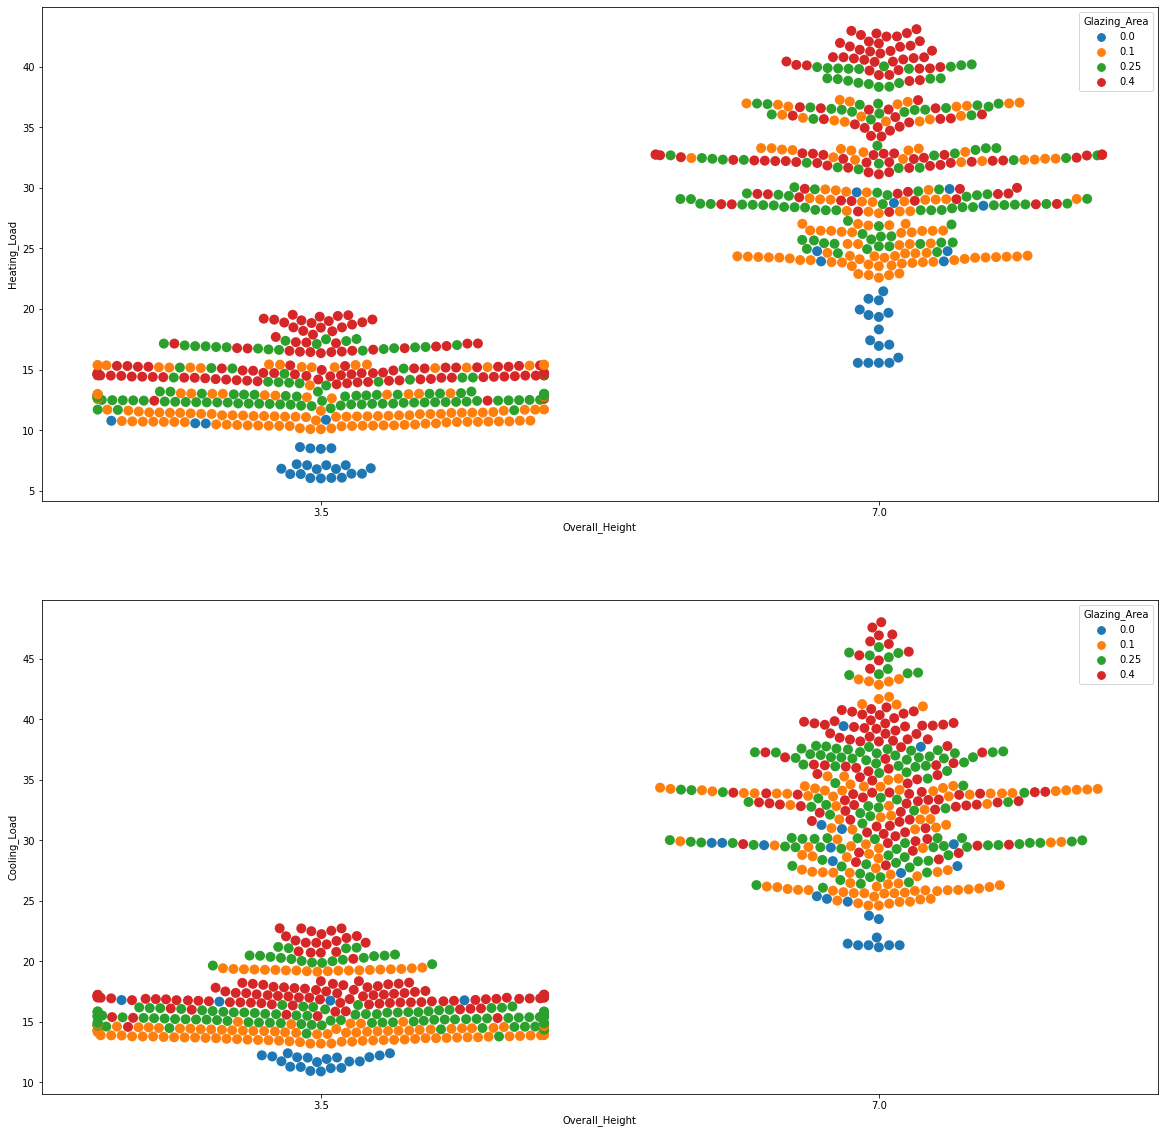

In [43]:
fig_22, axs_22 = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

for i in range(len(Y.columns)):
    sns.swarmplot(x='Overall_Height', y='%s' %(Y.columns[i]), hue='Glazing_Area', data=df, size=10, ax=axs_22[i])

## Feature Scaling

In [44]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [129]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled = df_scaled.drop(['Heating_Load', 'Cooling_Load'], axis=1)
Y_hscaled = df_scaled['Heating_Load']
Y_cscaled = df_scaled['Cooling_Load']

## Correlation

<AxesSubplot:>

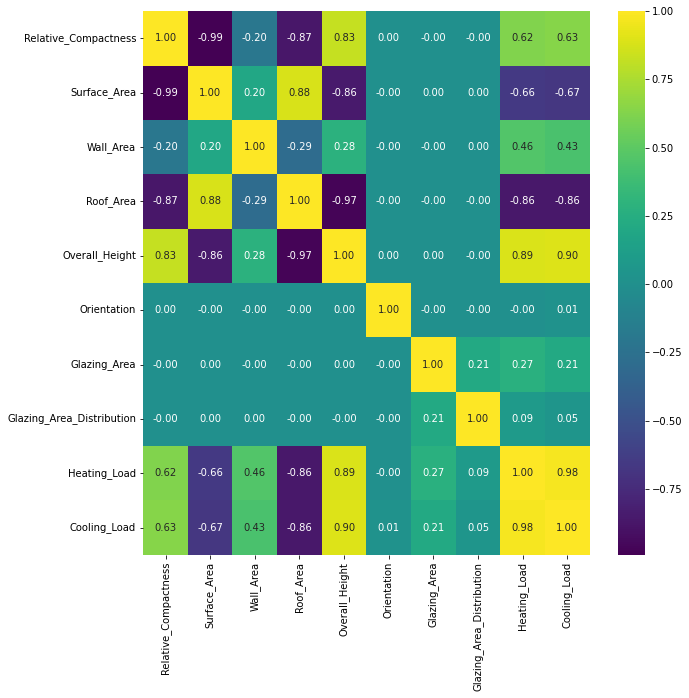

In [52]:
num_corr = df.corr()

fig_23, axs_23 = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.heatmap(num_corr, annot=True, fmt='.2f', cmap='viridis')

## Regression: Heating Load

In [56]:
from sklearn.model_selection import train_test_split
X_htrain, X_htest, y_htrain, y_htest = train_test_split(X_scaled, Y_hscaled, test_size=0.33, random_state=42)

### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()

In [84]:
lin_reg.fit(X_htrain, y_htrain)
y_hpred = lin_reg.predict(X_htest)

In [85]:
lin_mse = mean_squared_error(y_htest, y_hpred)
np.sqrt(lin_mse)

0.15872267561831457

In [86]:
r2_score(y_htest, y_hpred)

0.9157835330580028

#### Recursive Feature Elimination

In [63]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [87]:
def generate_model():
    models = {}
    for i in range(2, len(X_htrain.columns)):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        models[str(i)] = Pipeline(steps=[('r', rfe), ('m', model)])
    return models 

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return scores

models = generate_model()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_htrain, y_htrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 -0.063 (0.013)
>3 -0.055 (0.013)
>4 -0.041 (0.017)
>5 -0.038 (0.016)
>6 -0.025 (0.007)
>7 -0.025 (0.006)


In [93]:
top=[]
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe.fit(X_htrain, y_htrain)
for i in range(X_htrain.shape[1]):
    print(X_htrain.columns[i], 'Selected %s, Rank: %.3f' % (rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True:
        top.append(X_htrain.columns[i])

Relative_Compactness Selected True, Rank: 1.000
Surface_Area Selected True, Rank: 1.000
Wall_Area Selected True, Rank: 1.000
Roof_Area Selected True, Rank: 1.000
Overall_Height Selected True, Rank: 1.000
Orientation Selected False, Rank: 3.000
Glazing_Area Selected True, Rank: 1.000
Glazing_Area_Distribution Selected False, Rank: 2.000


In [175]:
lin_regh = LinearRegression()

X_htrain_rfe = X_htrain[top]
X_htest_rfe = X_htest[top]

lin_regh.fit(X_htrain_rfe, y_htrain)
y_hpred = lin_regh.predict(X_htest_rfe)

In [176]:
lin_mse = mean_squared_error(y_htest, y_hpred)
np.sqrt(lin_mse)

0.15840392131465397

In [177]:
r2_score(y_htest, y_hpred)

0.9161214483069893

<AxesSubplot:xlabel='Heating_Load', ylabel='Density'>

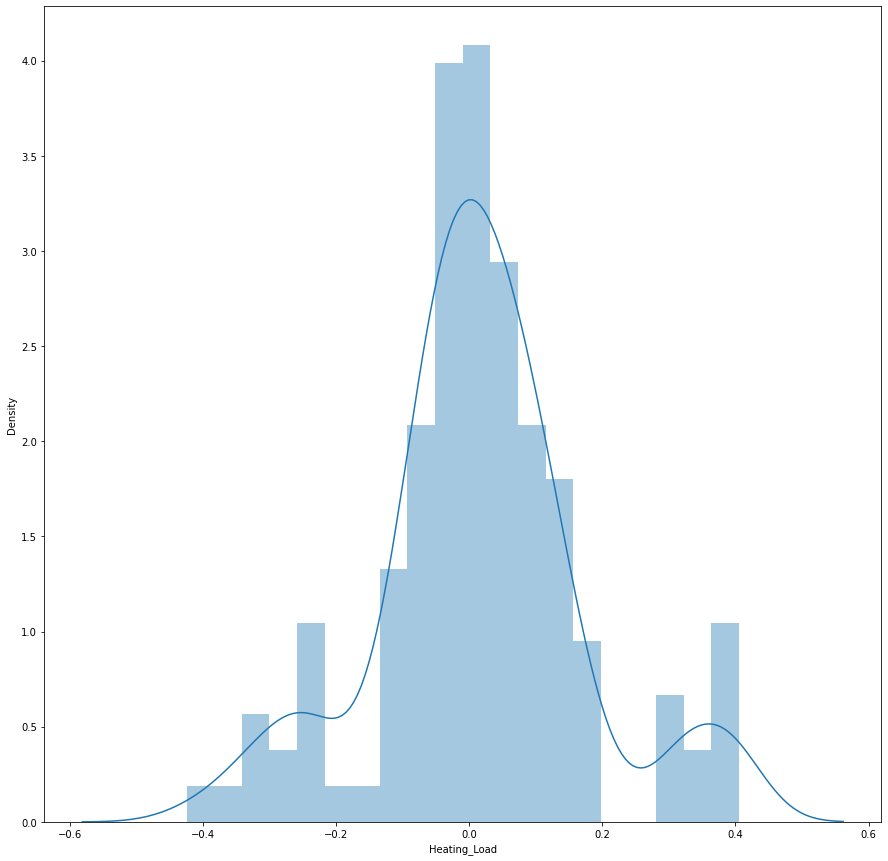

In [107]:
fig_24, axs_24 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.distplot((y_htest - y_hpred), bins = 20)

### Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()  

In [109]:
rfr.fit(X_htrain, y_htrain)
y_hpred = rfr.predict(X_htest)

In [110]:
rfr_mse = mean_squared_error(y_htest, y_hpred)
np.sqrt(rfr_mse)

0.026706683039204024

In [111]:
r2_score(y_htest, y_hpred)

0.9976157105864603

<AxesSubplot:xlabel='Heating_Load', ylabel='Density'>

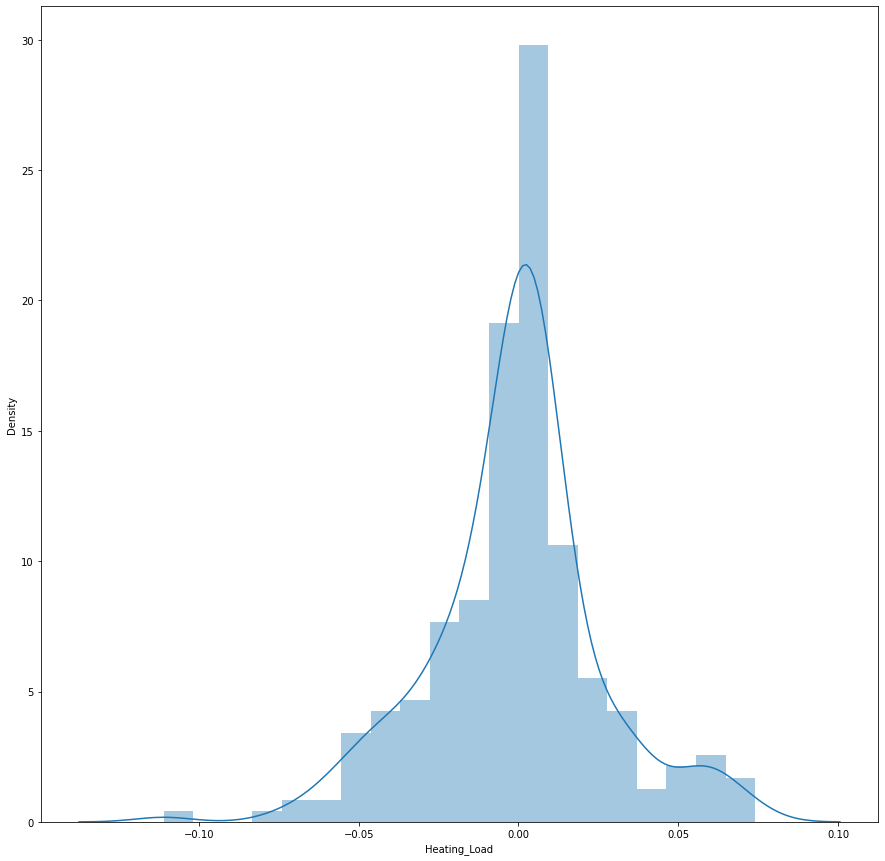

In [112]:
fig_25, axs_25 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.distplot((y_htest - y_hpred), bins = 20)

#### Grid Search

In [114]:
from sklearn.model_selection import GridSearchCV

parameters ={'n_estimators':[int(x) for x in np.linspace(start=100, stop=500, num=10)],
             'max_depth':[4, 6, 8],
             'min_samples_split':[2, 4, 6],
             'min_samples_leaf':[1, 2, 3],
            'random_state':[42]}

In [164]:
rfh_imp = RandomForestRegressor()
rfh_Grid = GridSearchCV(estimator=rf_imp, param_grid=parameters, cv=5, verbose=3)

In [165]:
rfh_Grid.fit(X_htrain, y_htrain)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.977 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.978 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.977 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.982 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.977 total time=   0.2s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=144, random_state=42;, score=0.977 total time=   0.3s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=144, random_state=42;, score=0.978 total time=   0.3

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=6, min_samples_split=4,
                                             n_estimators=144,
                                             random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 144, 188, 233, 277, 322, 366,
                                          411, 455, 500],
                         'random_state': [42]},
             verbose=3)

In [166]:
rfh_Grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 144,
 'random_state': 42}

In [170]:
rfh_imp = RandomForestRegressor(**rfh_Grid.best_params_)
rfh_imp.fit(X_htrain, y_htrain)
y_hpred = rfh_imp.predict(X_htest)

In [171]:
rfh_mse = mean_squared_error(y_htest, y_hpred)
np.sqrt(rfh_mse)

0.026190131497333048

In [172]:
r2_score(y_htest, y_hpred)

0.9977070508473822

In [173]:
important_features = []
important_features_score = []
for i in range(len(rfh_imp.feature_importances_)):
    if rfh_imp.feature_importances_[i] > 0.001:
        important_features.append(X_htrain.columns[i])
        important_features_score.append(round(rfh_imp.feature_importances_[i], 3))

df_feature_ranking = pd.DataFrame({'feature': important_features, 'score': important_features_score}).sort_values('score', ascending=False)
print(df_feature_ranking)

                     feature  score
1               Surface_Area  0.393
4             Overall_Height  0.175
0       Relative_Compactness  0.167
3                  Roof_Area  0.128
5               Glazing_Area  0.076
2                  Wall_Area  0.045
6  Glazing_Area_Distribution  0.015


## Regression: Cooling Load

In [132]:
from sklearn.model_selection import train_test_split
X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(X_scaled, Y_cscaled, test_size=0.33, random_state=42)

### Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()

In [134]:
lin_reg.fit(X_ctrain, y_ctrain)
y_cpred = lin_reg.predict(X_ctest)

In [135]:
lin_mse = mean_squared_error(y_ctest, y_cpred)
np.sqrt(lin_mse)

0.18274729070815304

In [137]:
r2_score(y_ctest, y_cpred)

0.8890538166604984

#### Recursive Feature Elimination

In [63]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [139]:
def generate_model():
    models = {}
    for i in range(2, len(X_ctrain.columns)):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        model = LinearRegression()
        models[str(i)] = Pipeline(steps=[('r', rfe), ('m', model)])
    return models 

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return scores

models = generate_model()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_ctrain, y_ctrain)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>2 -0.058 (0.014)
>3 -0.056 (0.015)
>4 -0.048 (0.012)
>5 -0.041 (0.013)
>6 -0.034 (0.009)
>7 -0.034 (0.009)


In [140]:
top=[]
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe.fit(X_ctrain, y_ctrain)
for i in range(X_ctrain.shape[1]):
    print(X_ctrain.columns[i], 'Selected %s, Rank: %.3f' % (rfe.support_[i], rfe.ranking_[i]))
    if rfe.support_[i] == True:
        top.append(X_ctrain.columns[i])

Relative_Compactness Selected True, Rank: 1.000
Surface_Area Selected True, Rank: 1.000
Wall_Area Selected True, Rank: 1.000
Roof_Area Selected True, Rank: 1.000
Overall_Height Selected True, Rank: 1.000
Orientation Selected False, Rank: 2.000
Glazing_Area Selected True, Rank: 1.000
Glazing_Area_Distribution Selected False, Rank: 3.000


In [142]:
X_ctrain_rfe = X_ctrain[top]
X_ctest_rfe = X_ctest[top]

lin_reg.fit(X_ctrain_rfe, y_ctrain)
y_cpred = lin_reg.predict(X_ctest_rfe)

In [143]:
lin_mse = mean_squared_error(y_ctest, y_cpred)
np.sqrt(lin_mse)

0.18258964383603282

In [144]:
r2_score(y_ctest, y_cpred)

0.8892451494534651

<AxesSubplot:xlabel='Cooling_Load', ylabel='Density'>

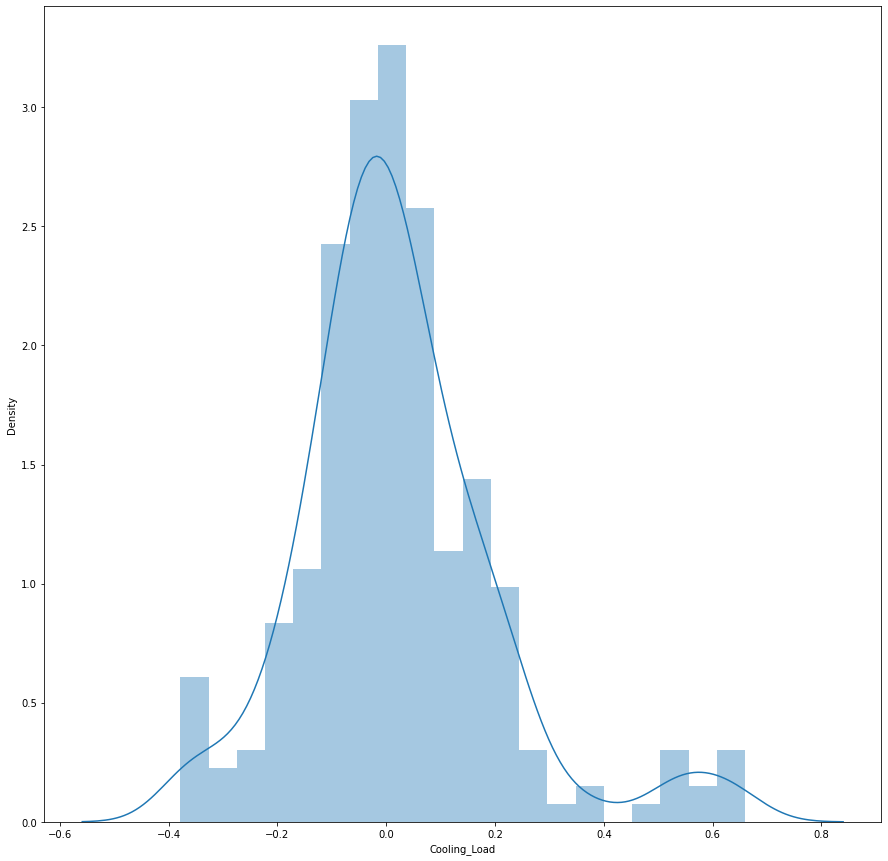

In [145]:
fig_24, axs_24 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.distplot((y_ctest - y_cpred), bins = 20)

### Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()  

In [146]:
rfr.fit(X_ctrain, y_ctrain)
y_cpred = rfr.predict(X_ctest)

In [147]:
rfr_mse = mean_squared_error(y_ctest, y_cpred)
np.sqrt(rfr_mse)

0.09487728992926871

In [148]:
r2_score(y_ctest, y_cpred)

0.9700956054181523

<AxesSubplot:xlabel='Cooling_Load', ylabel='Density'>

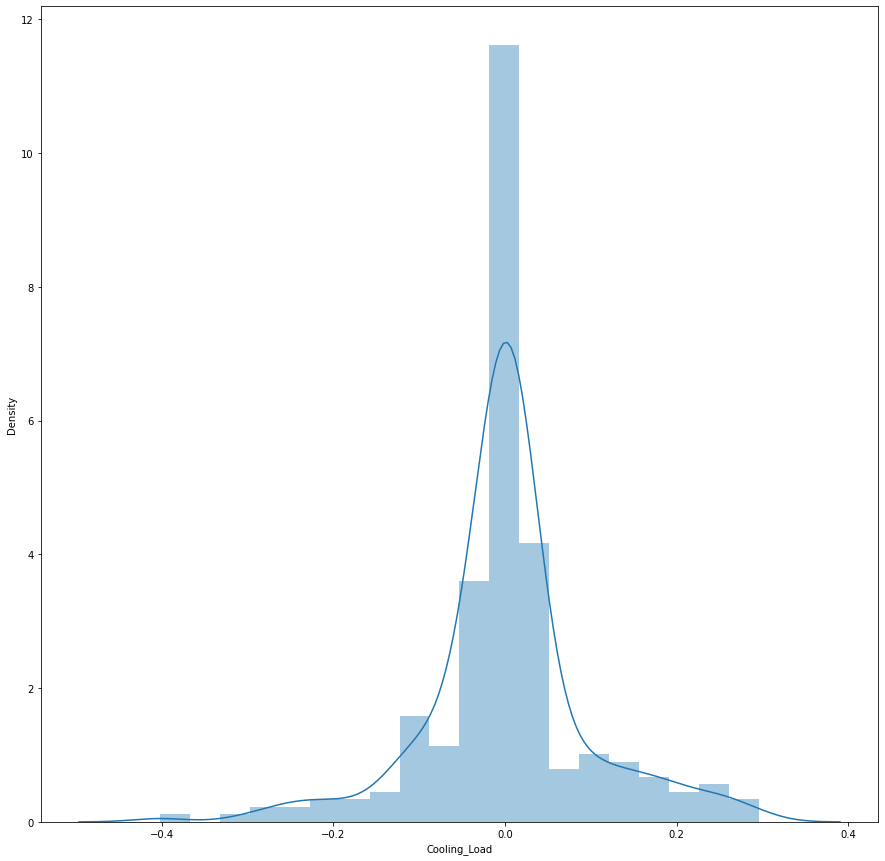

In [149]:
fig_25, axs_25 = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.distplot((y_ctest - y_cpred), bins = 20)

#### Grid Search

In [114]:
from sklearn.model_selection import GridSearchCV

parameters ={'n_estimators':[int(x) for x in np.linspace(start=100, stop=500, num=10)],
             'max_depth':[4, 6, 8],
             'min_samples_split':[2, 4, 6],
             'min_samples_leaf':[1, 2, 3],
            'random_state':[42]}

In [156]:
rfc_imp = RandomForestRegressor()
rfc_Grid = GridSearchCV(estimator=rf_imp, param_grid=parameters, cv=5, verbose=3)

In [157]:
rfc_Grid.fit(X_ctrain, y_ctrain)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.949 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.953 total time=   0.1s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.947 total time=   0.2s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.954 total time=   0.2s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42;, score=0.942 total time=   0.2s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=144, random_state=42;, score=0.949 total time=   0.2s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=144, random_state=42;, score=0.953 total time=   0.2

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=6, min_samples_split=4,
                                             n_estimators=144,
                                             random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 144, 188, 233, 277, 322, 366,
                                          411, 455, 500],
                         'random_state': [42]},
             verbose=3)

In [158]:
rfc_Grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 144,
 'random_state': 42}

In [159]:
rfc_imp = RandomForestRegressor(**rfc_Grid.best_params_)
rfc_imp.fit(X_ctrain, y_ctrain)
y_pred = rfc_imp.predict(X_ctest)

In [160]:
rfc_mse = mean_squared_error(y_ctest, y_cpred)
np.sqrt(rfc_mse)

0.09487728992926871

In [161]:
r2_score(y_ctest, y_cpred)

0.9700956054181523

In [163]:
important_features = []
important_features_score = []
for i in range(len(rfc_imp.feature_importances_)):
    if rfc_imp.feature_importances_[i] > 0.001:
        important_features.append(X_ctrain.columns[i])
        important_features_score.append(round(rfc_imp.feature_importances_[i], 3))

df_feature_ranking = pd.DataFrame({'feature': important_features, 'score': important_features_score}).sort_values('score', ascending=False)
print(df_feature_ranking)

                     feature  score
0       Relative_Compactness  0.377
1               Surface_Area  0.255
3                  Roof_Area  0.184
4             Overall_Height  0.085
6               Glazing_Area  0.045
2                  Wall_Area  0.042
7  Glazing_Area_Distribution  0.008
5                Orientation  0.004
